In [359]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

### Creating Non-Linear Data

In [360]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

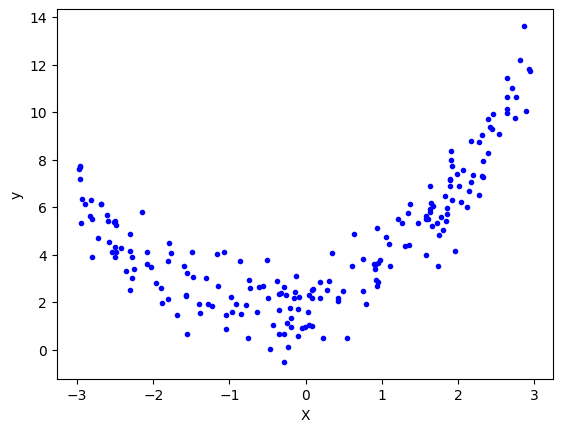

In [361]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Train-test split

In [362]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Applying Linear Regression

In [363]:
# Applying linear regression
lr = LinearRegression()

In [364]:
lr.fit(X_train,y_train)

LinearRegression()

In [365]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3180176977189393

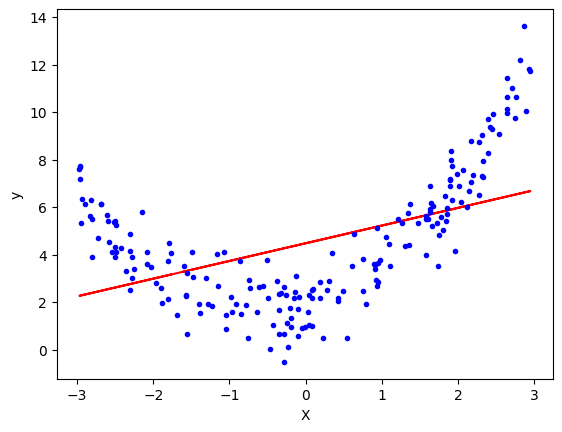

In [366]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Simple Polynomial Linear Regression

In [367]:
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [368]:
print(X_train[0])
print(X_train_trans[0])

[-1.76943155]
[ 1.         -1.76943155  3.130888  ]


In [369]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [370]:
y_pred = lr.predict(X_test_trans)

In [371]:
r2_score(y_test,y_pred)

0.868707985016599

In [372]:
print(lr.intercept_)
print(lr.coef_)

[2.0238351]
[[0.         0.90388097 0.8115891 ]]


### Polynomial Fit Visualization

In [373]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

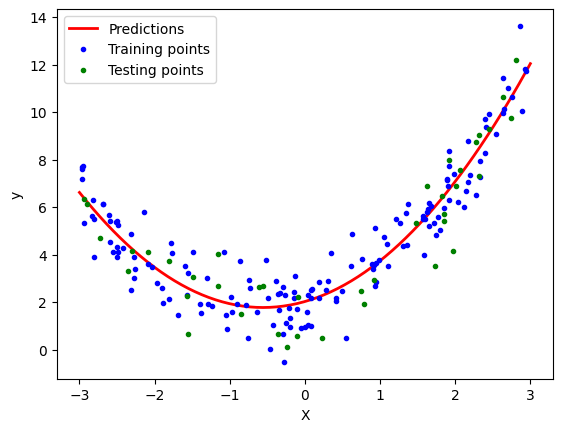

In [374]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Custom Polynomial_regression() method

In [375]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

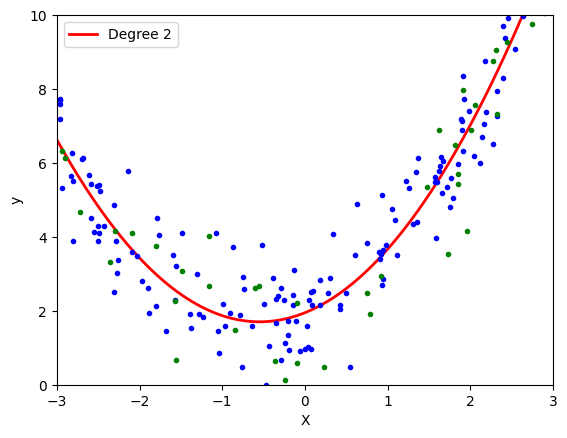

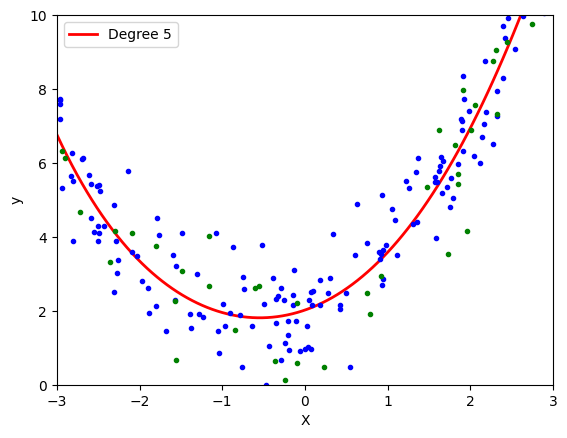

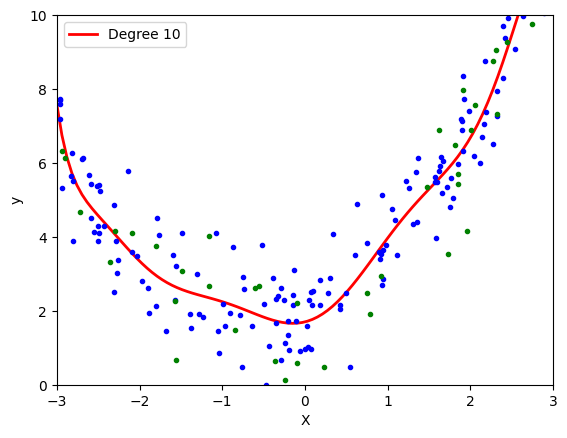

In [376]:
# when degree=2
polynomial_regression(2)

# when degree=5
polynomial_regression(5)

# when degree=10
polynomial_regression(10)

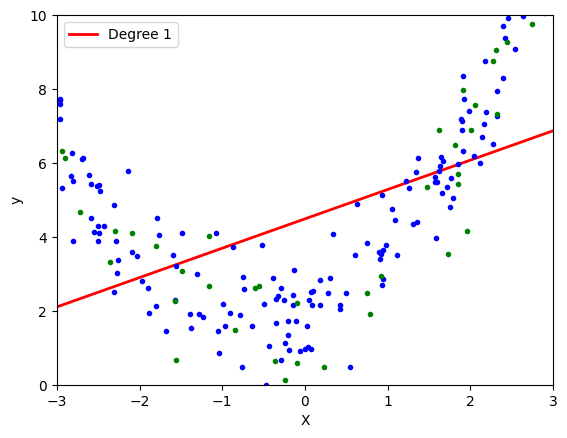

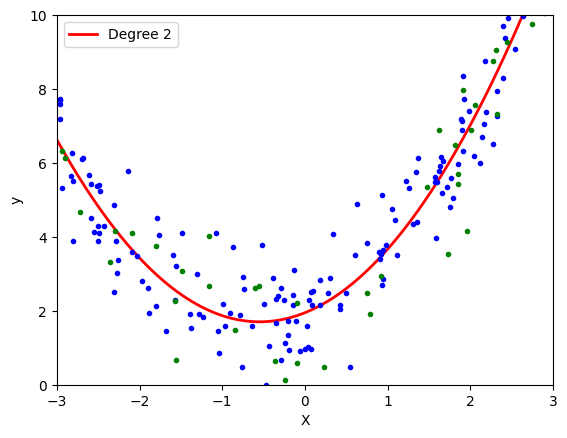

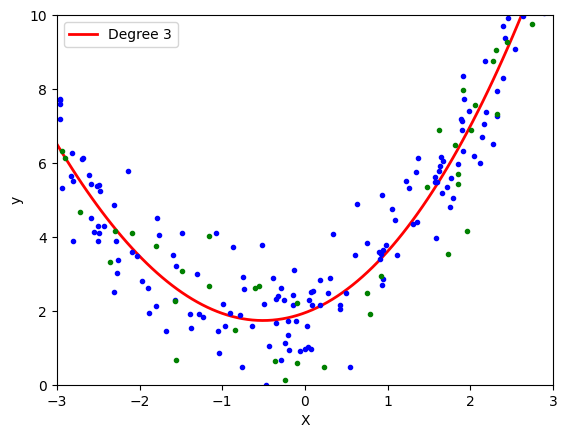

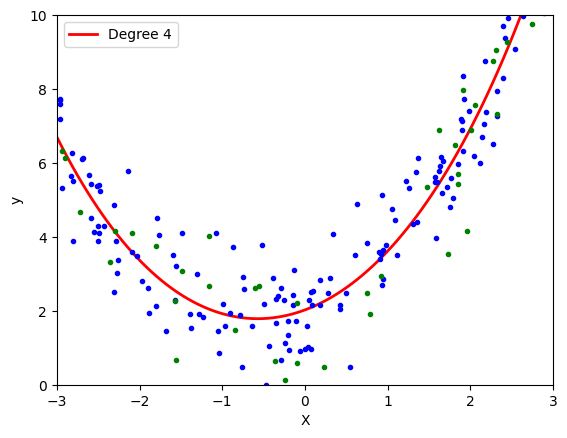

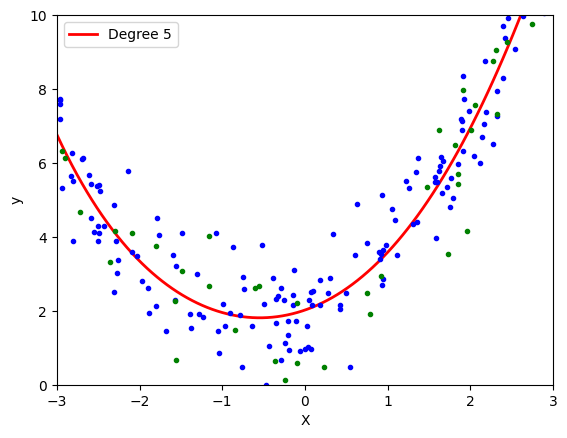

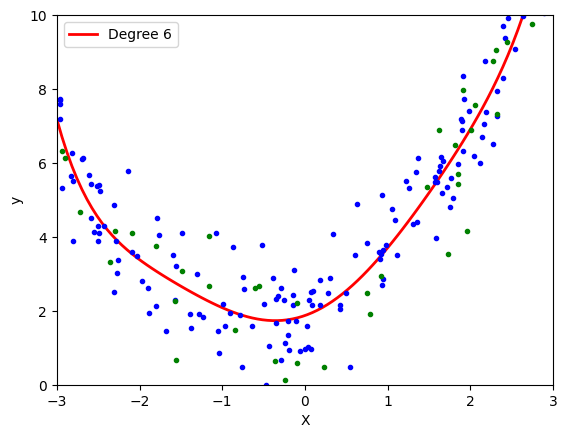

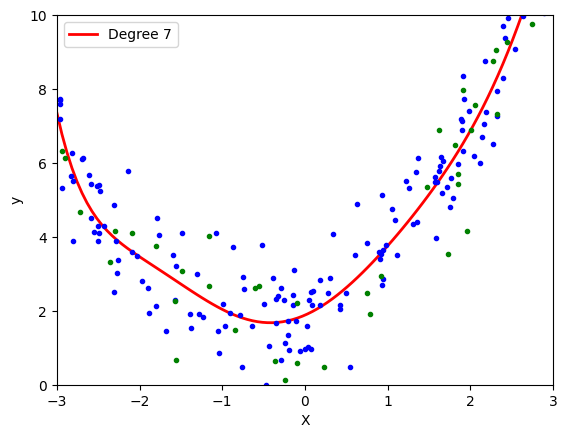

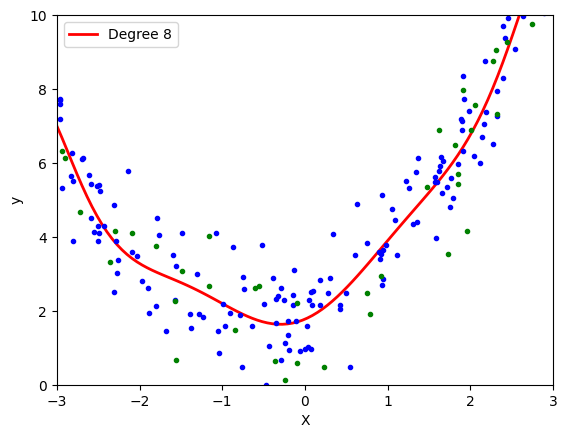

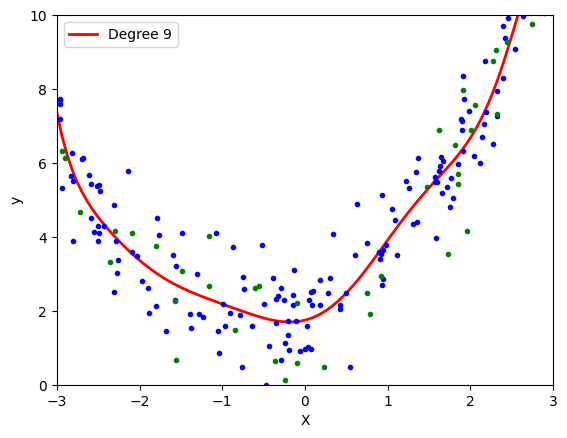

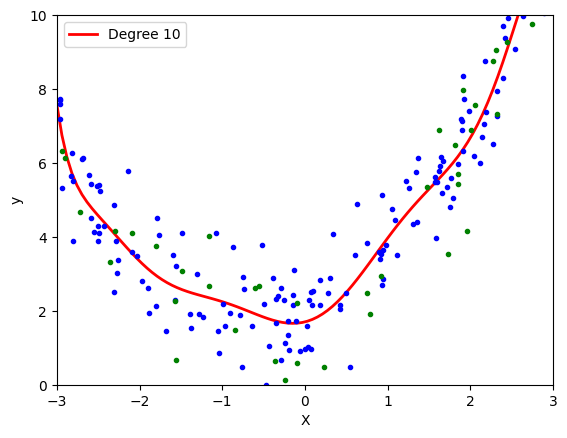

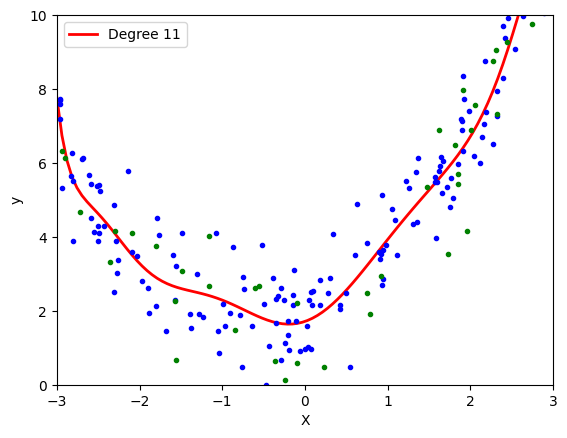

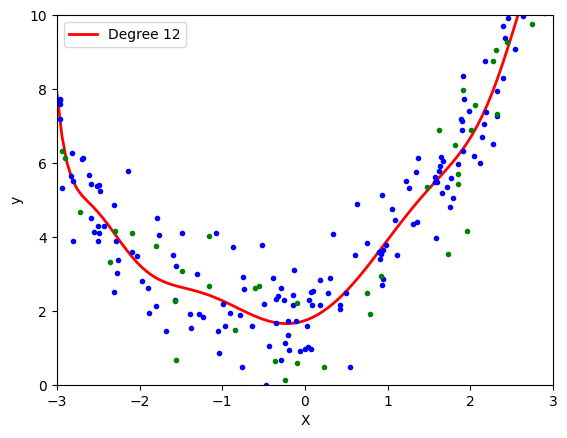

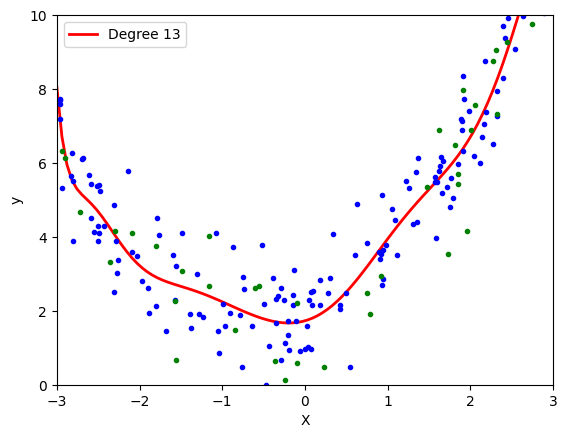

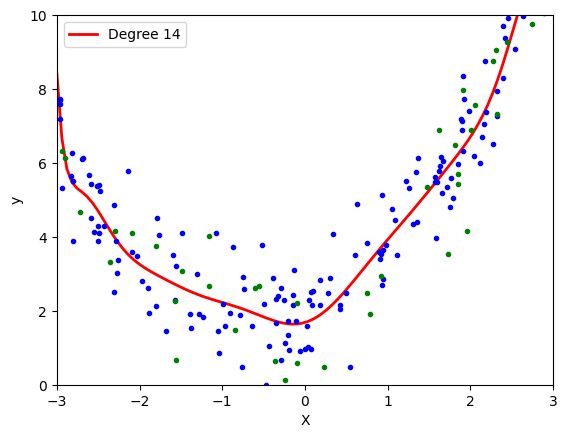

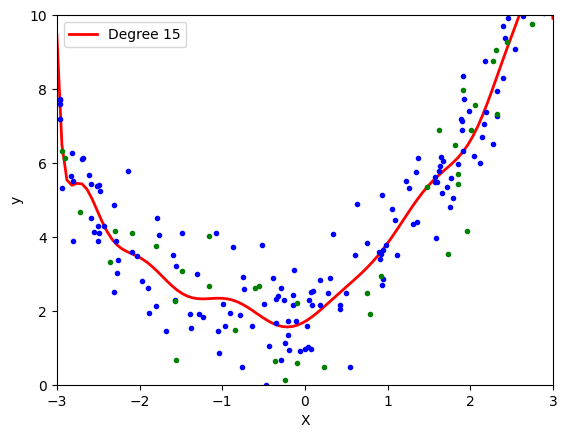

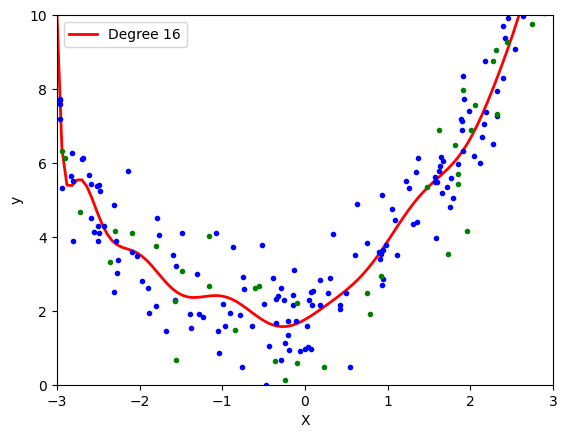

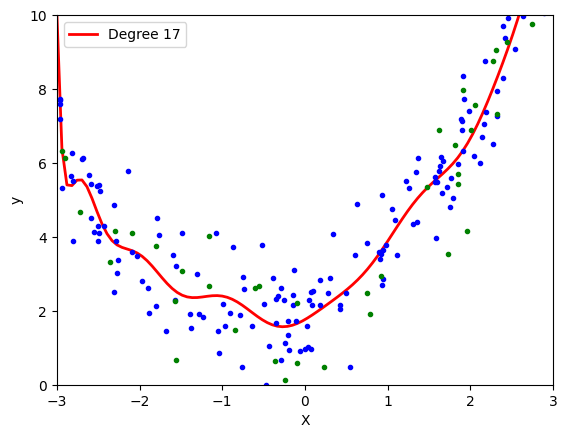

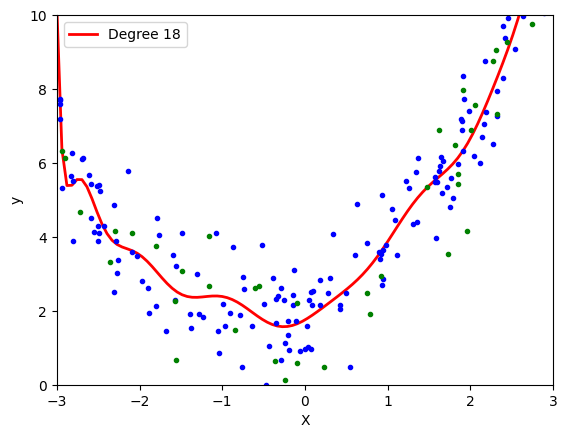

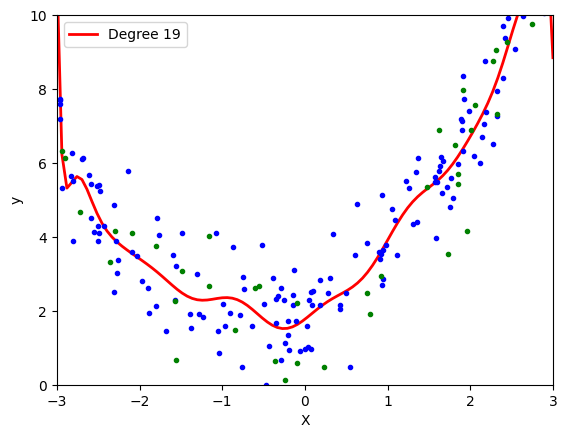

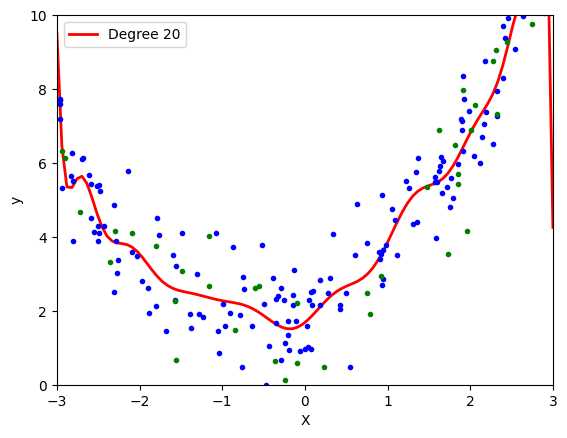

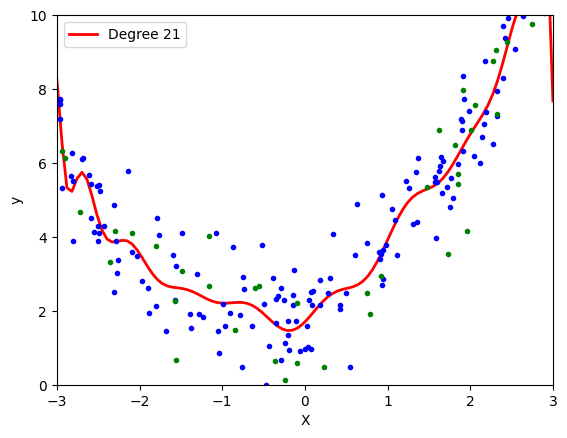

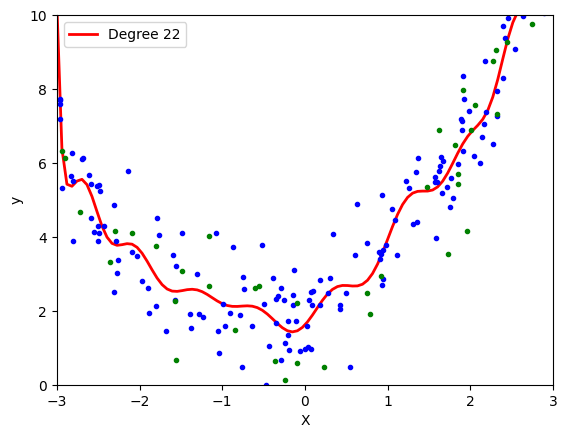

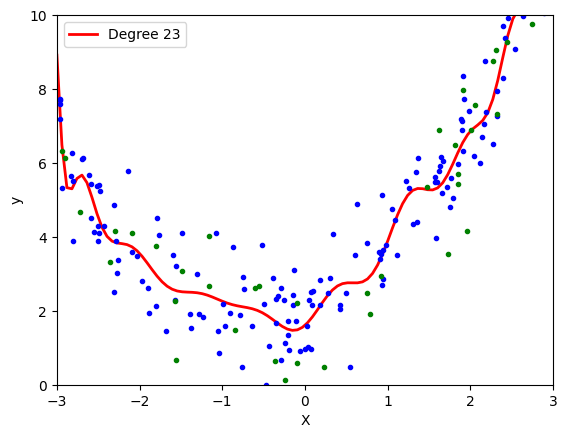

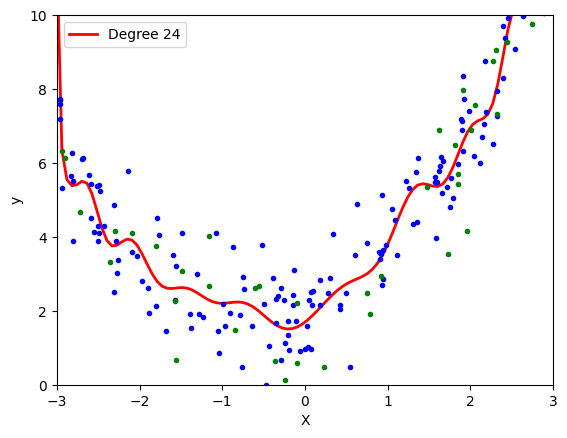

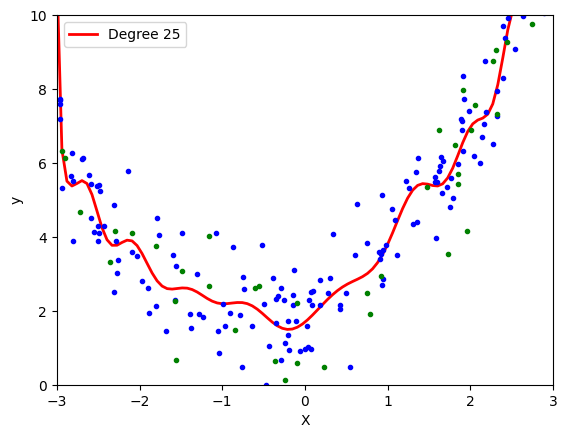

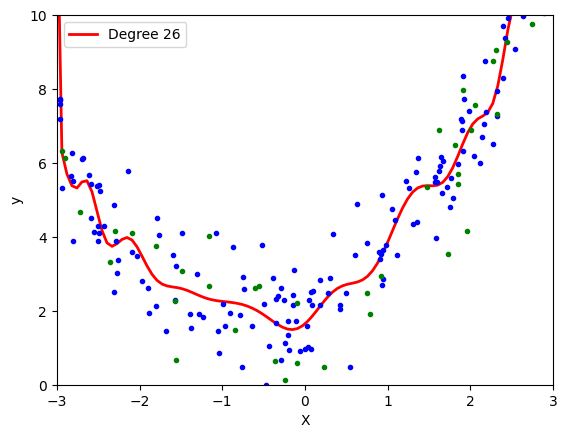

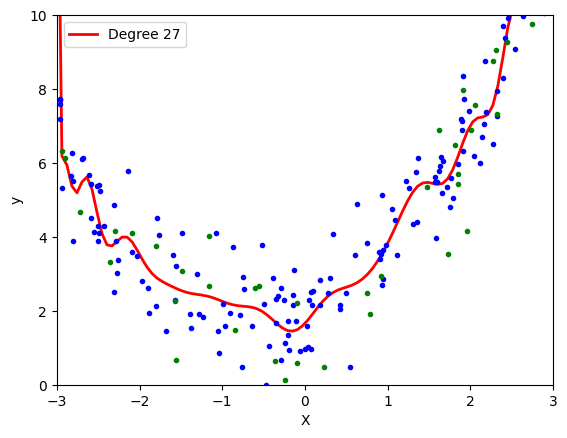

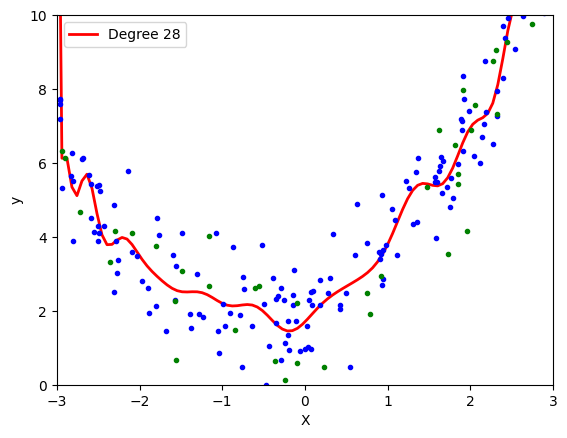

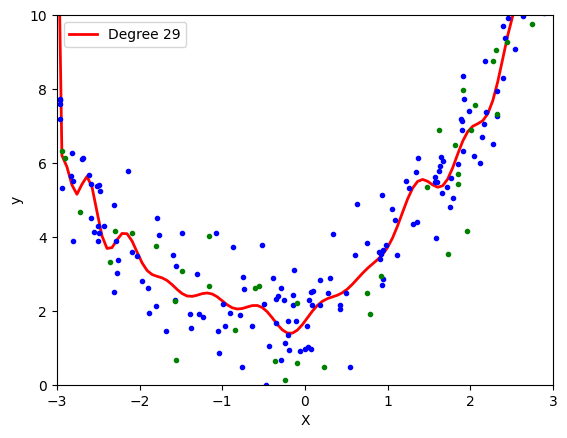

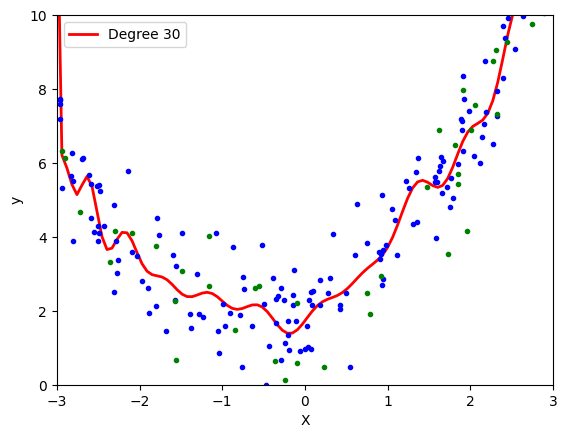

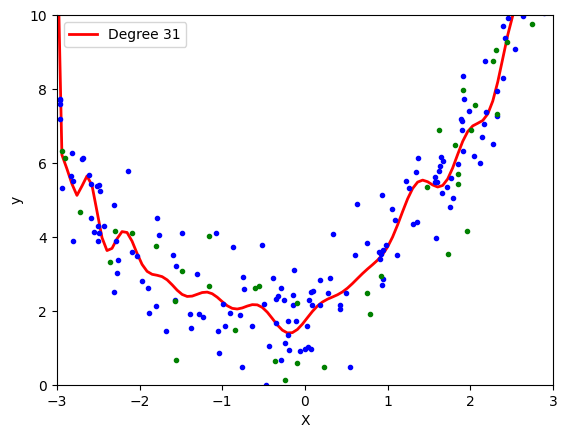

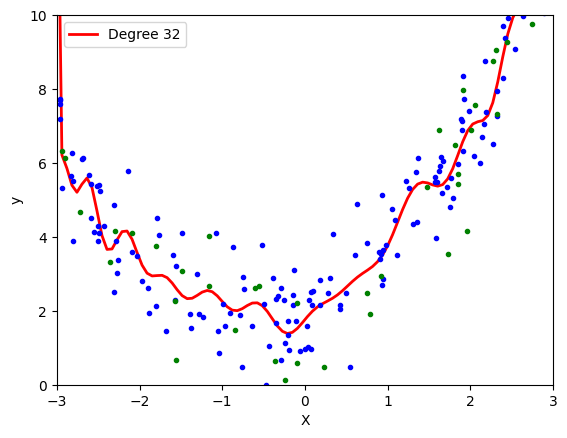

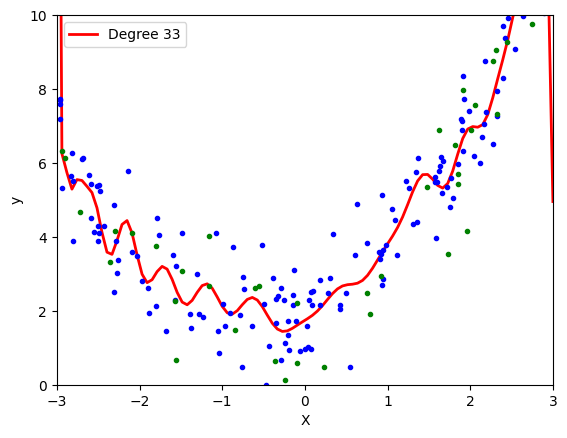

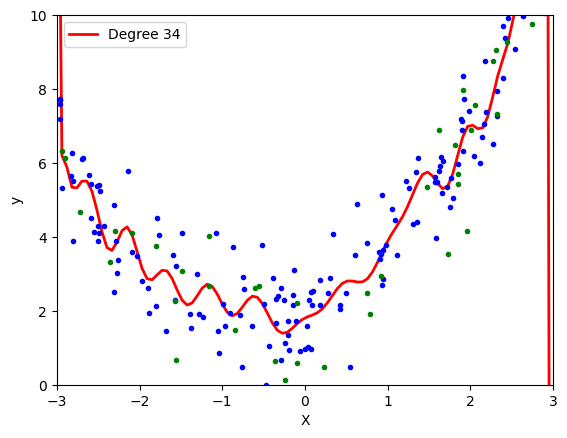

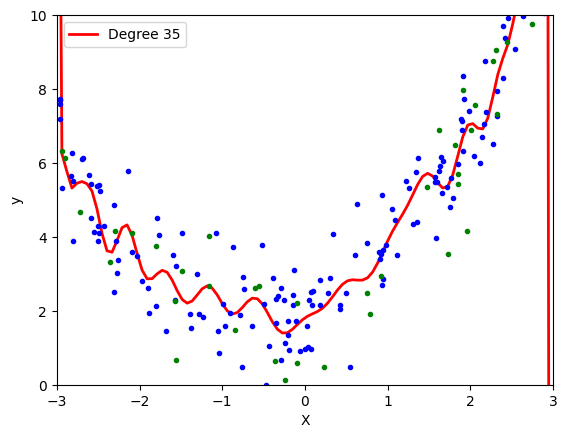

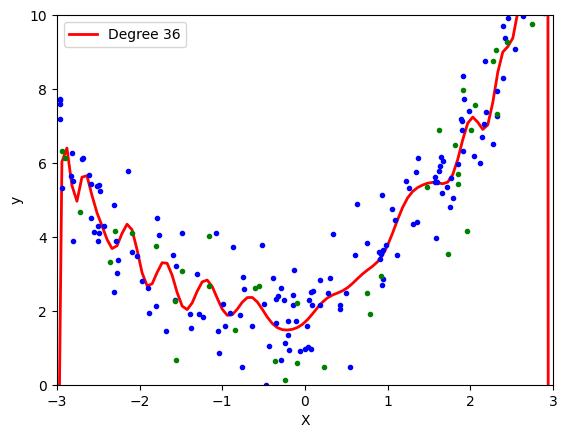

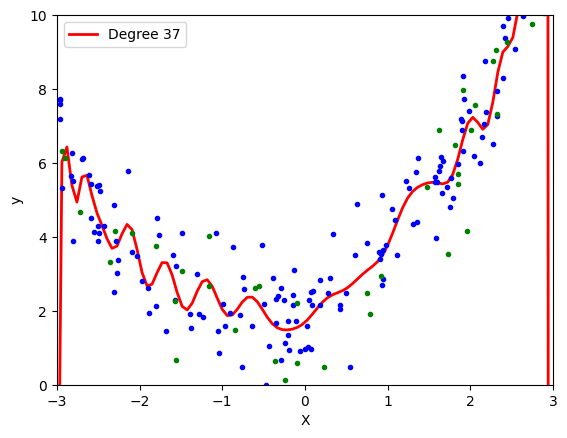

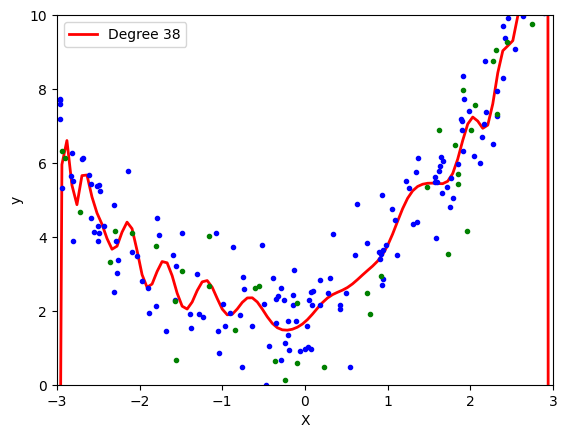

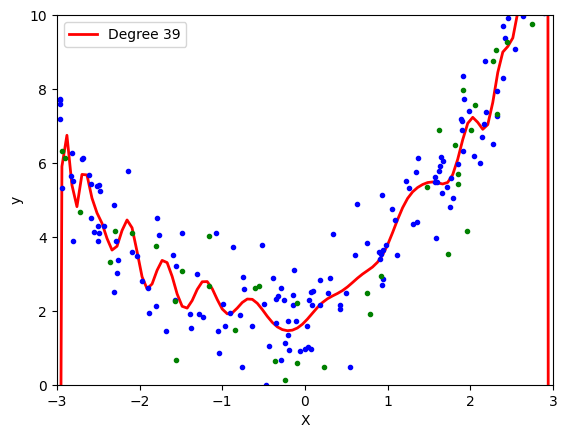

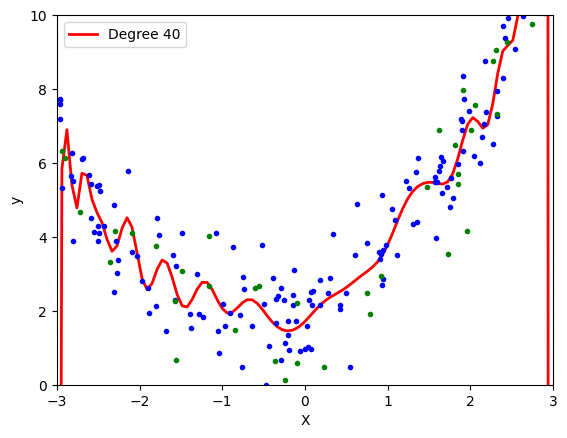

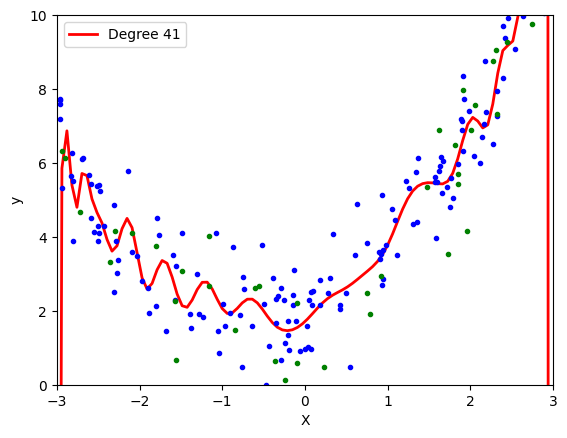

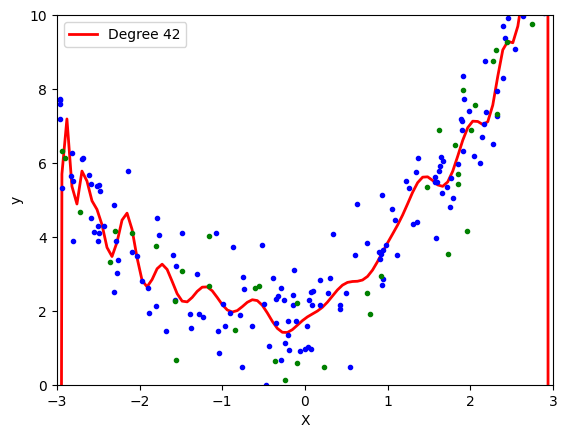

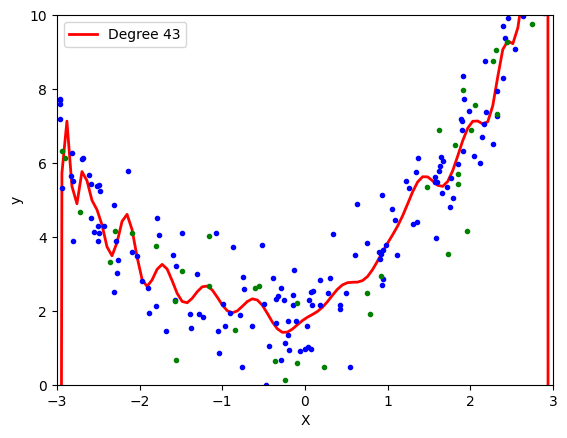

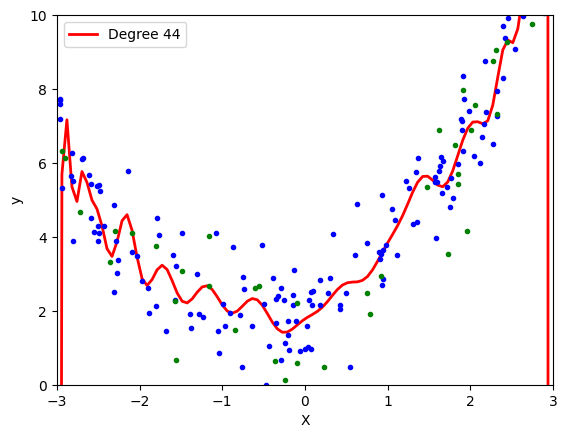

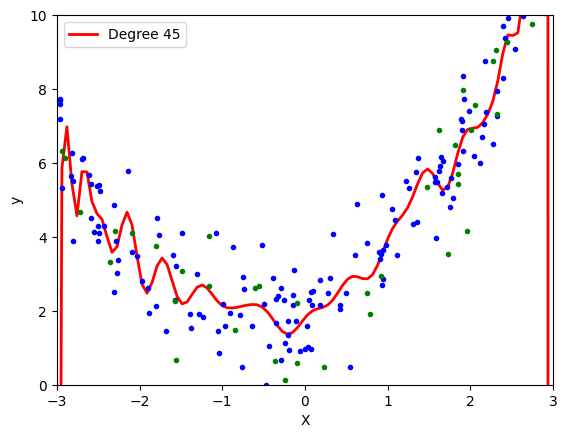

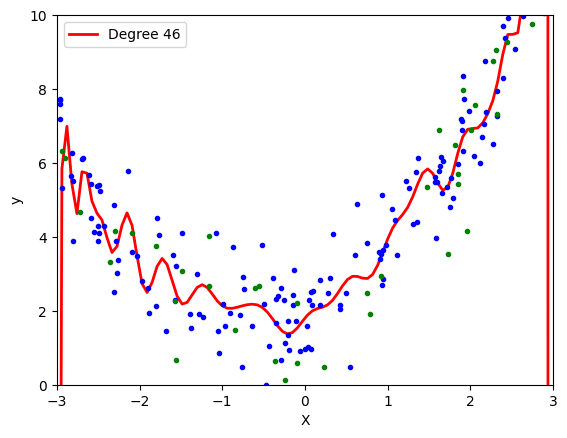

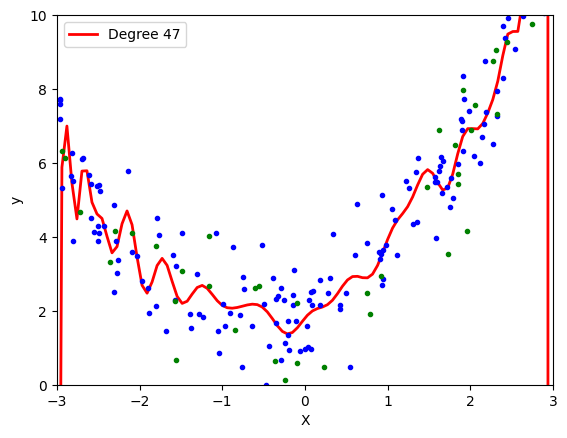

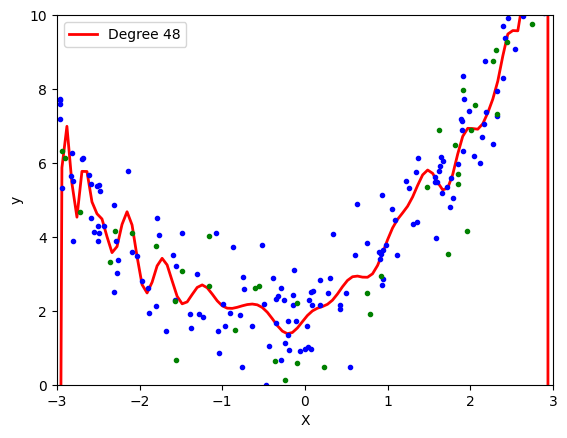

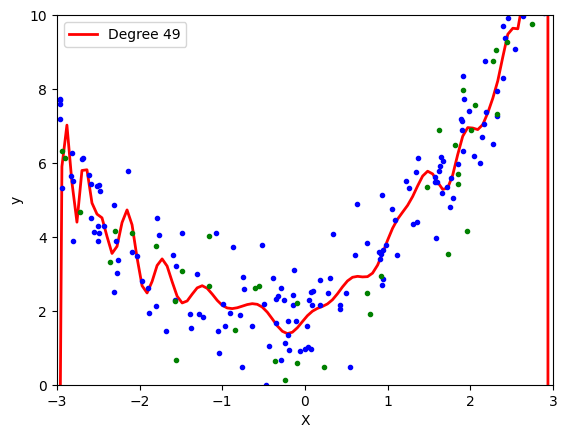

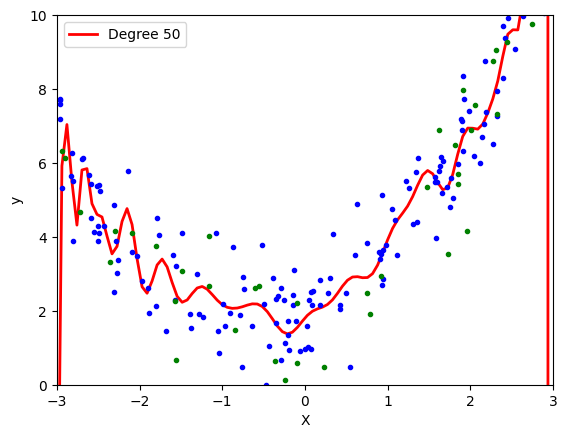

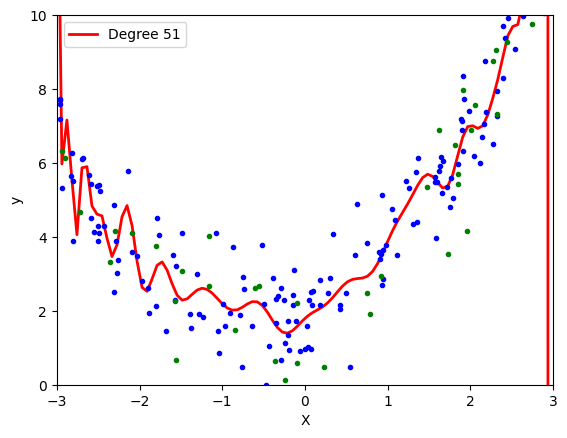

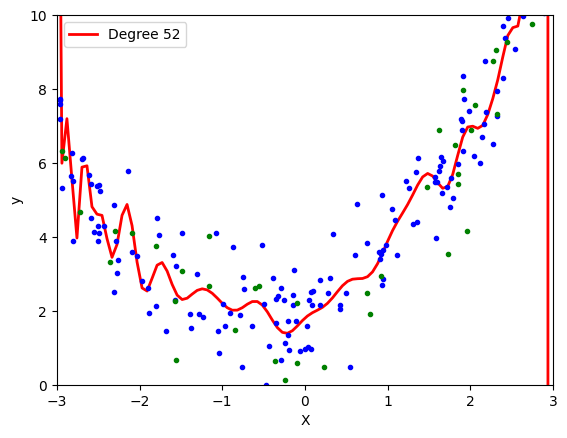

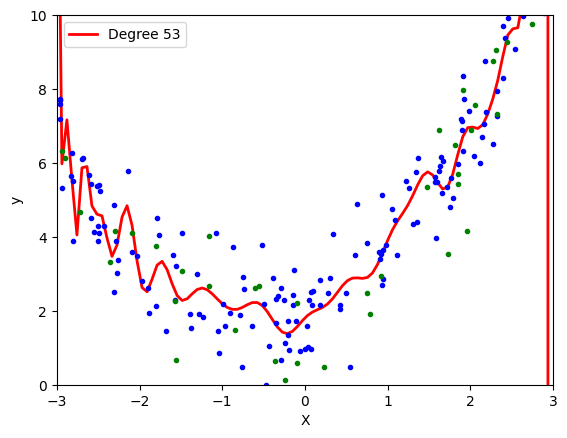

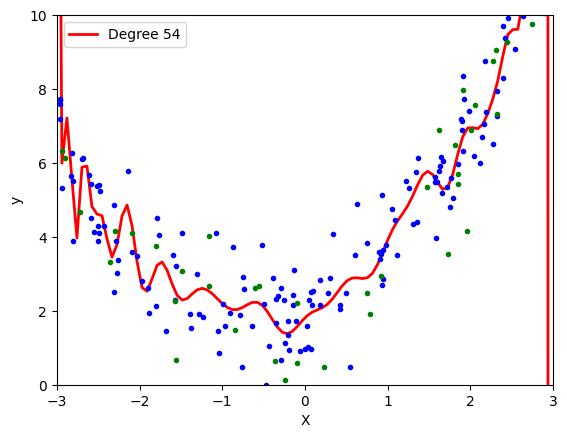

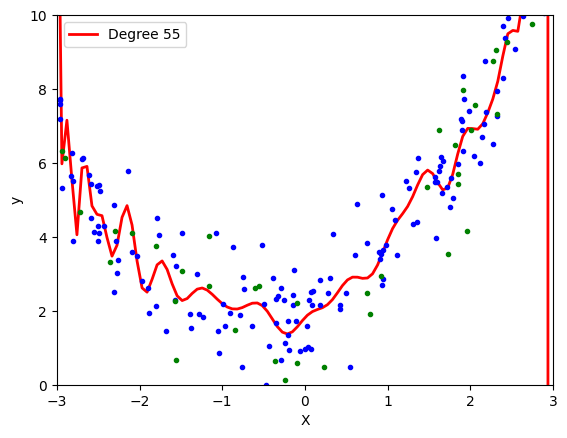

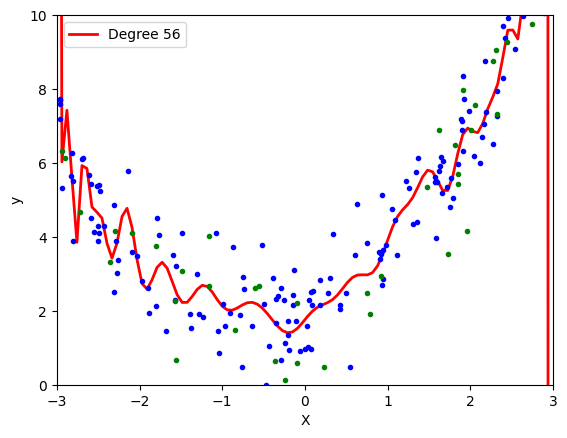

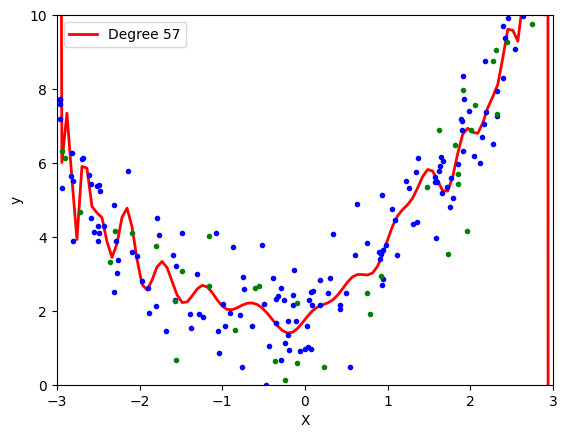

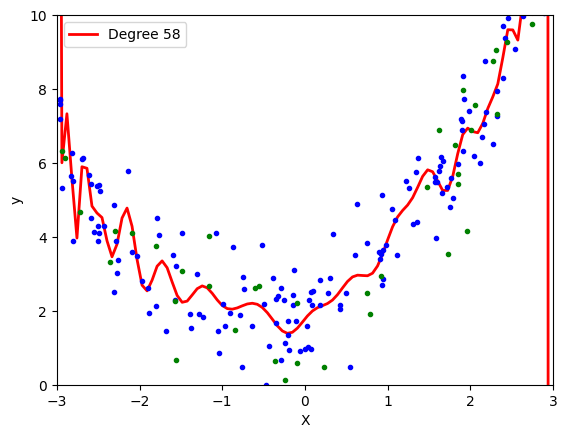

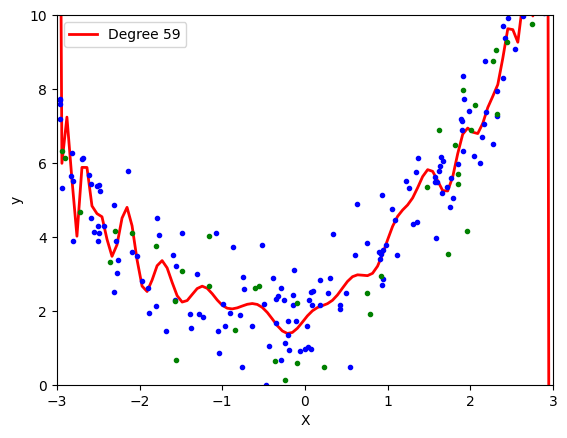

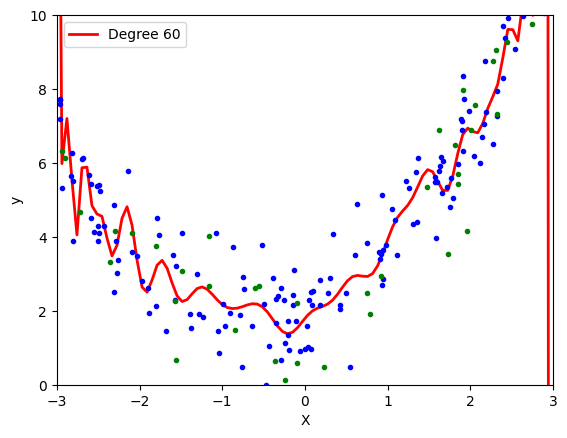

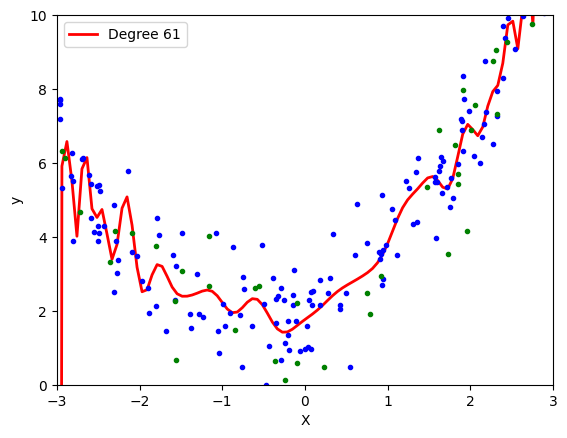

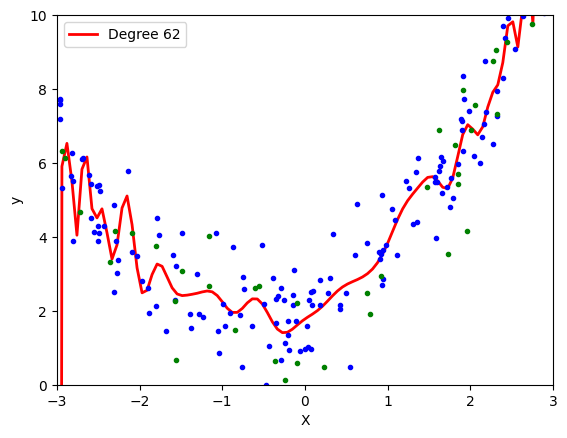

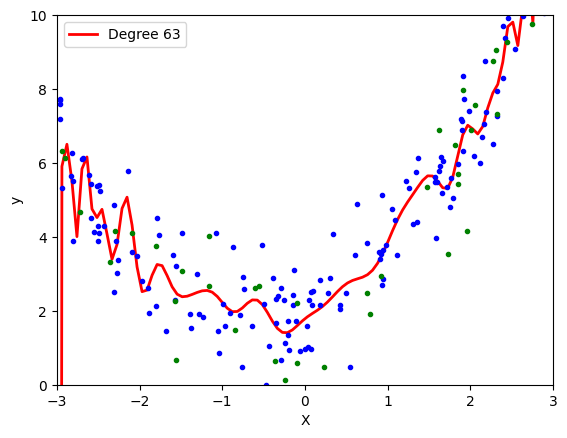

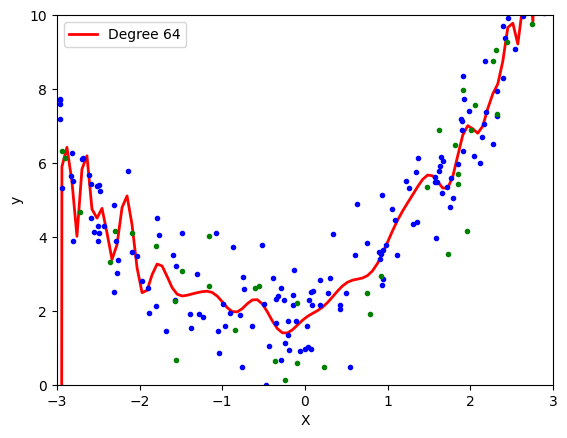

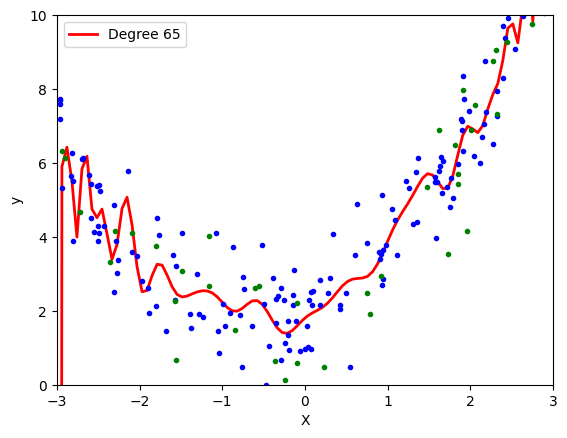

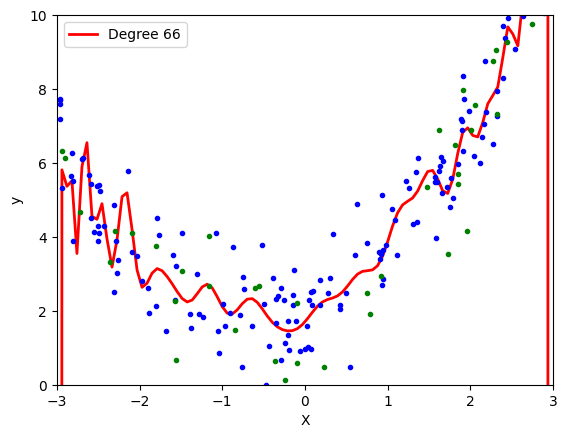

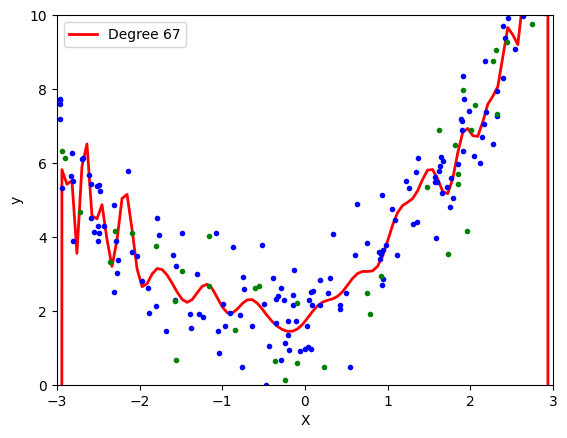

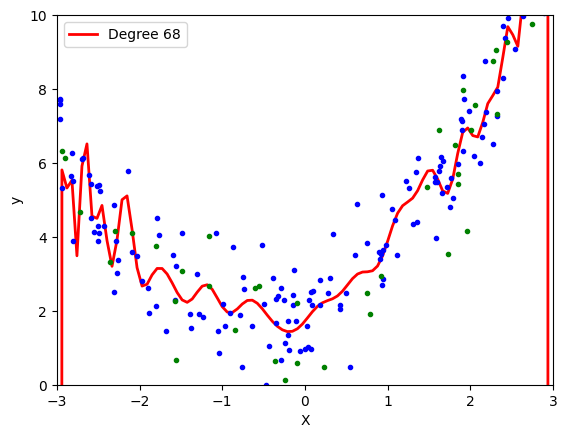

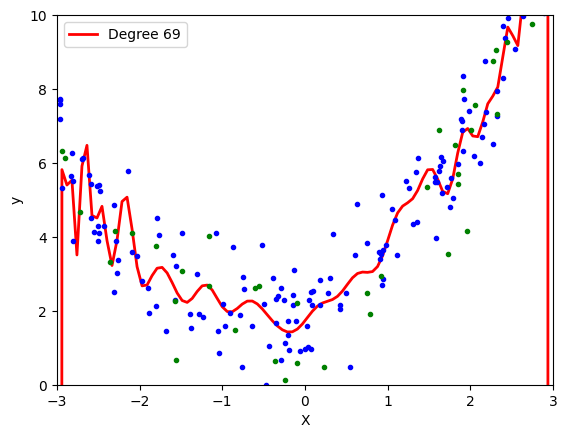

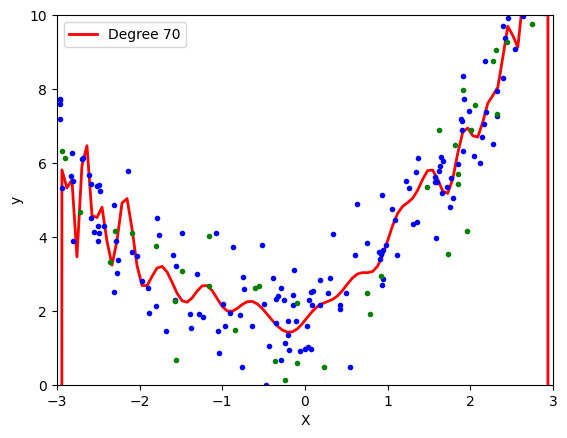

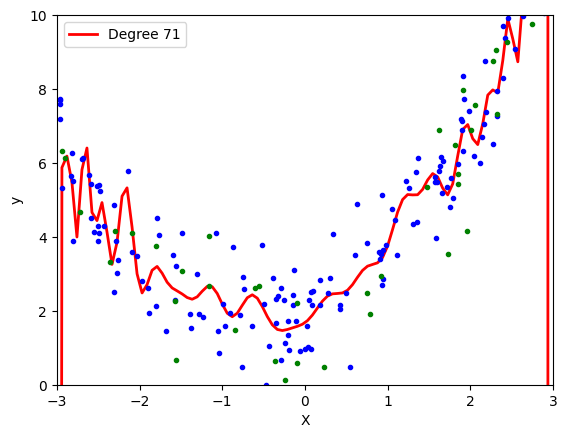

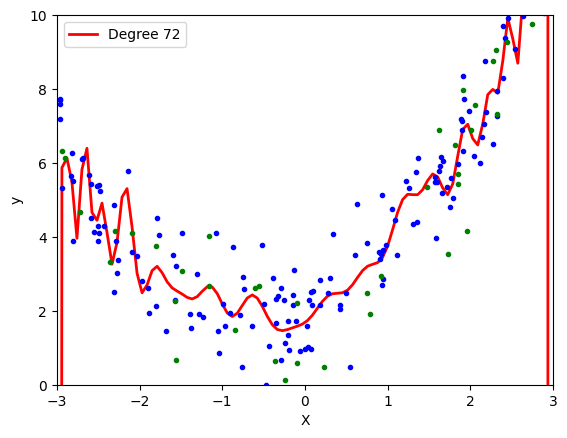

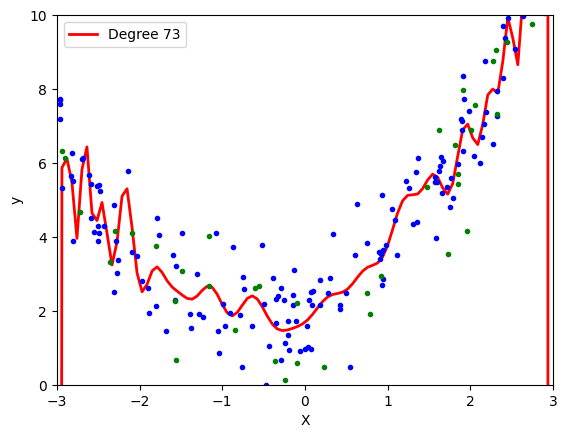

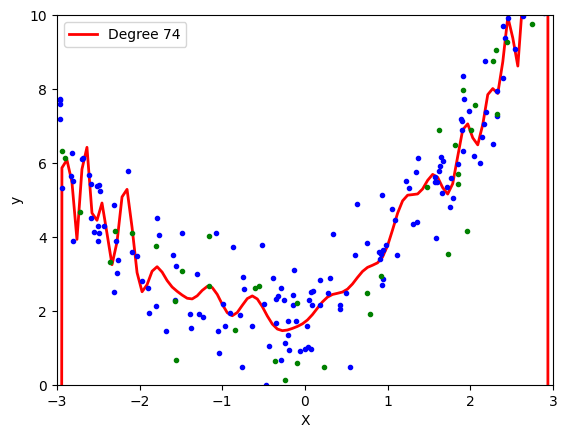

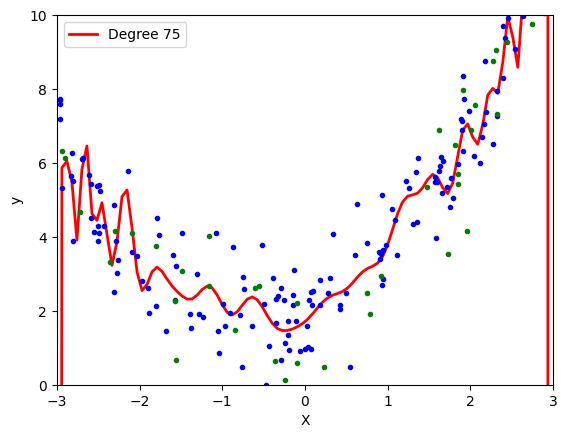

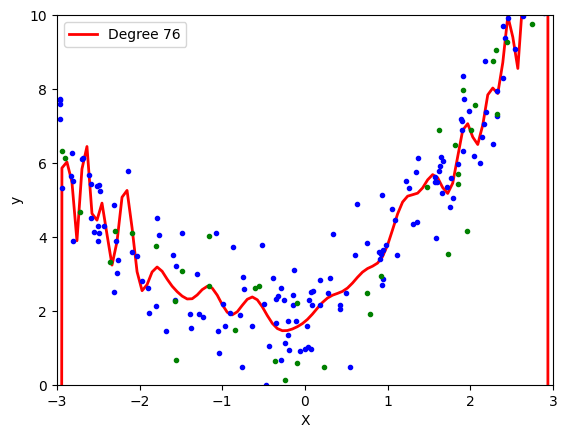

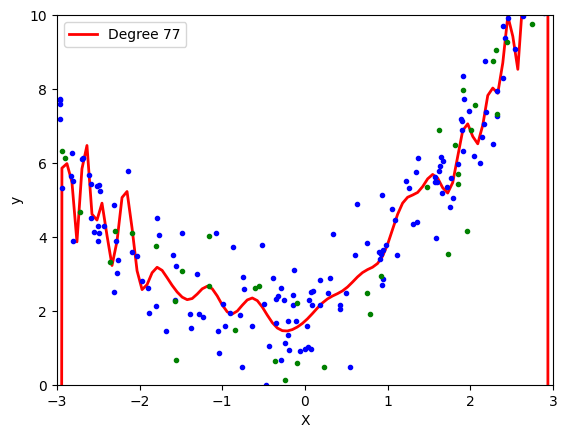

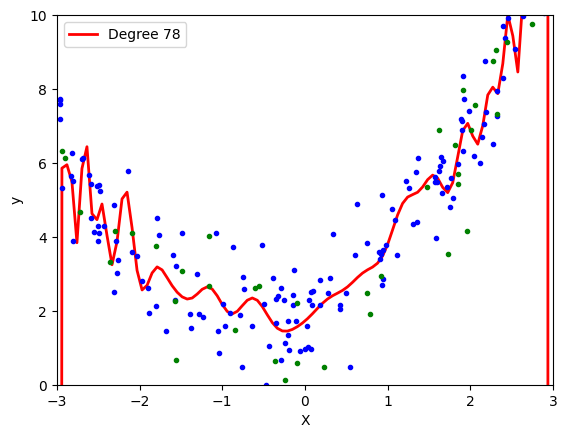

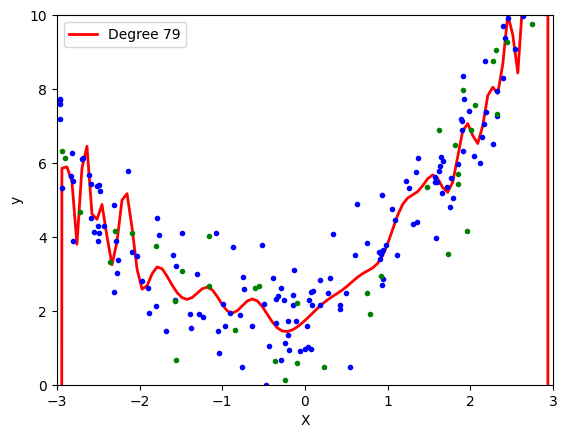

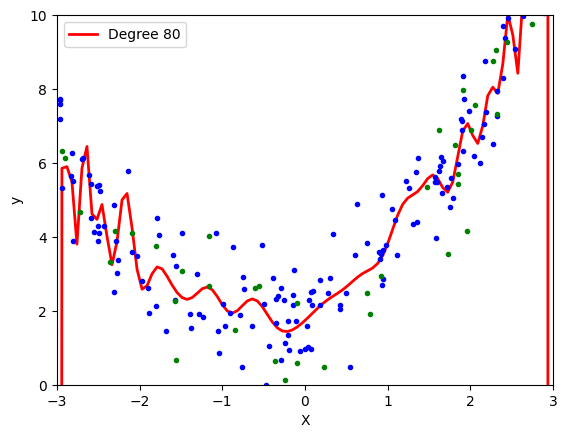

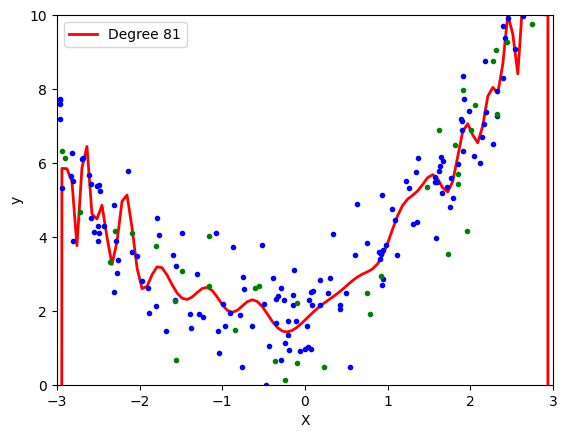

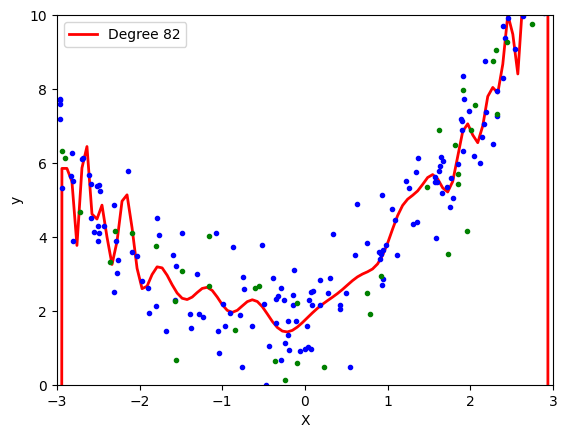

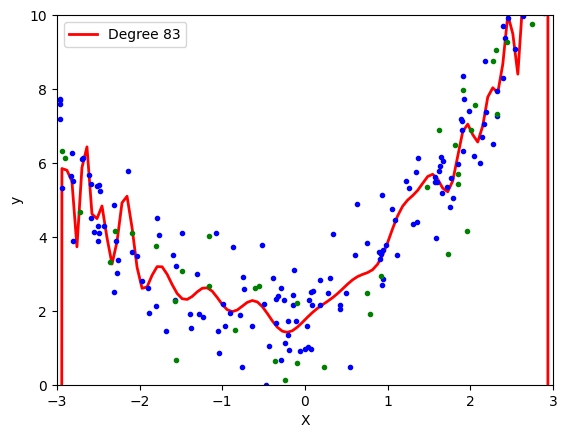

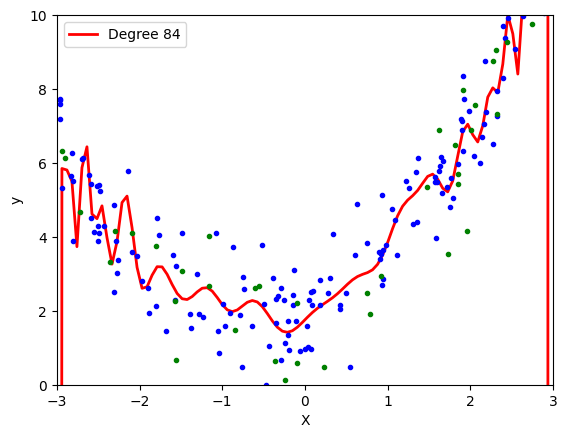

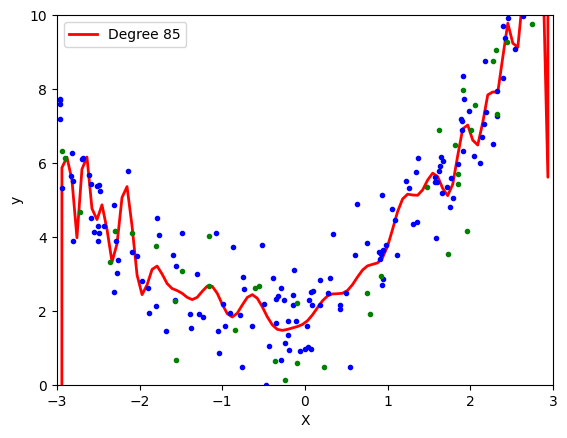

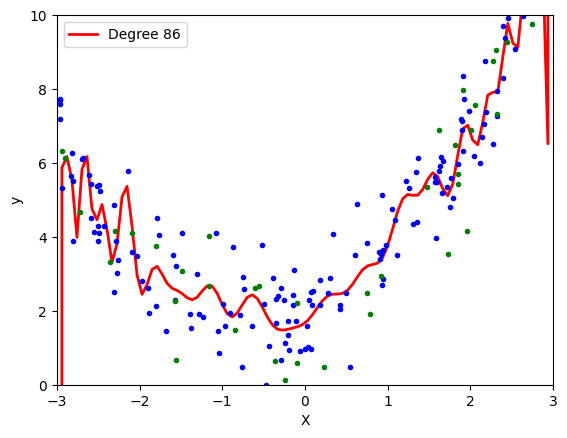

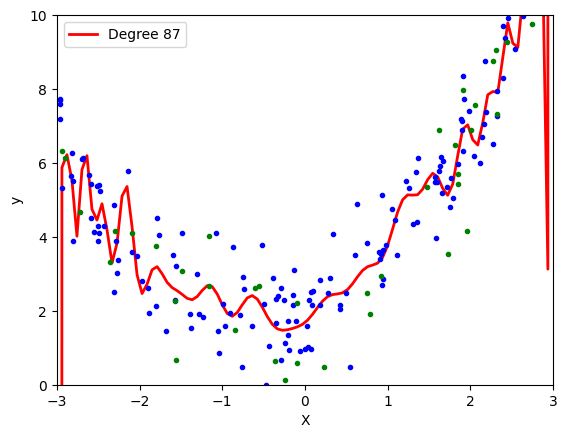

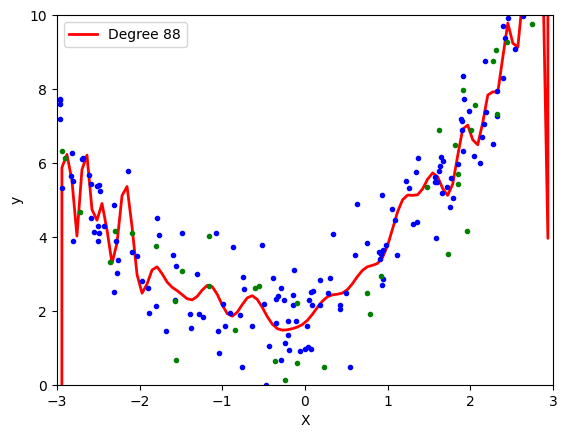

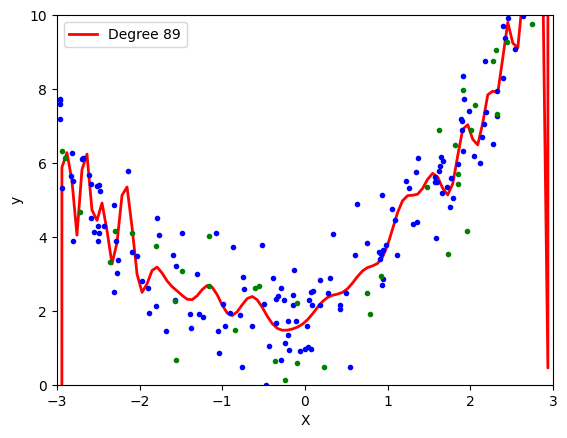

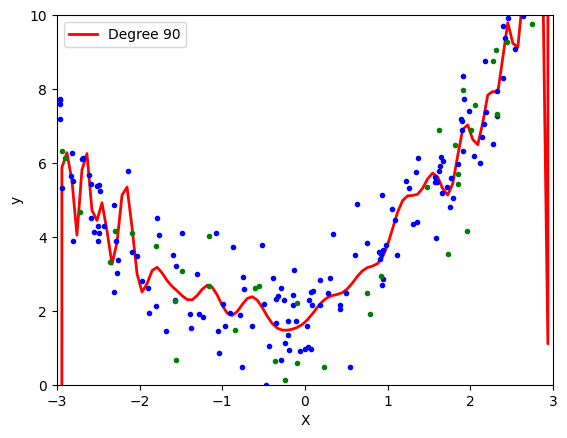

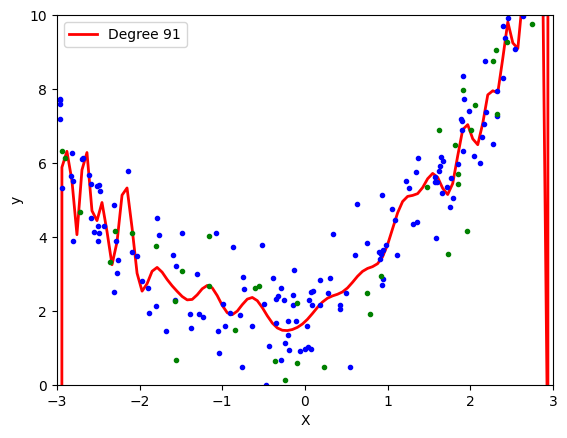

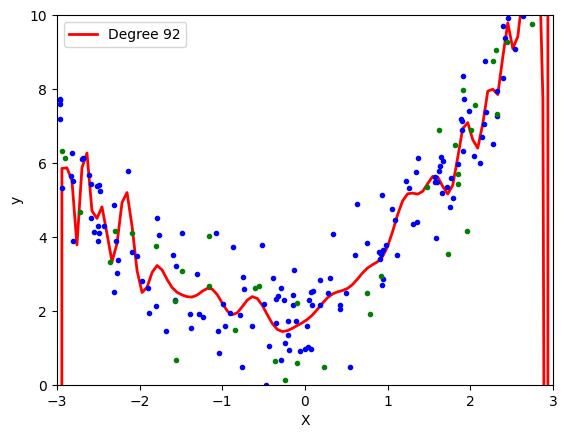

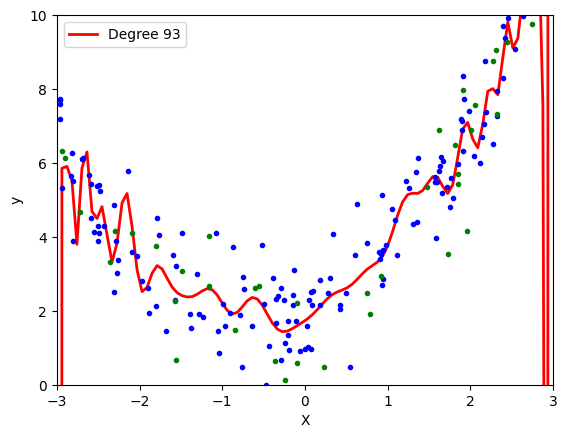

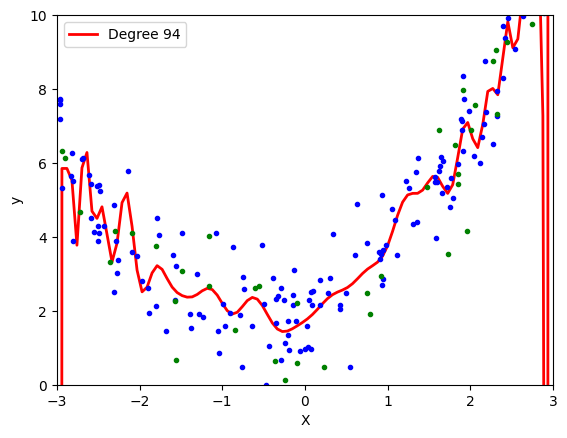

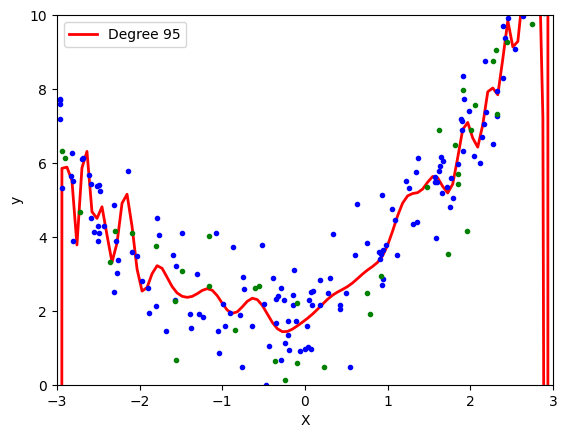

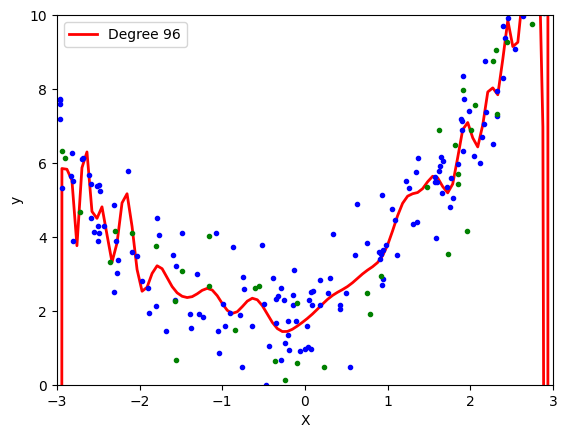

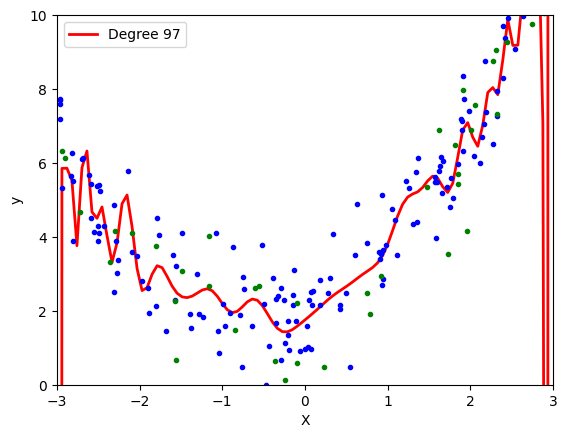

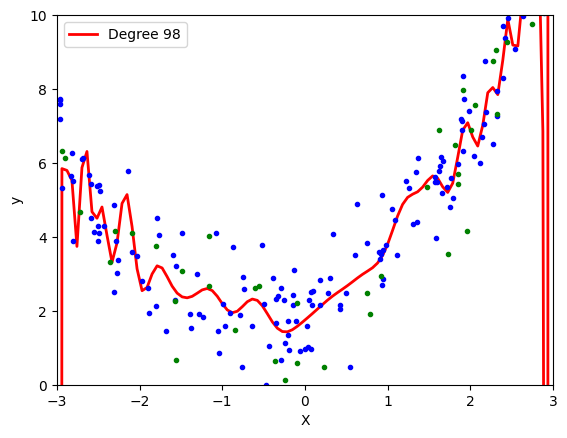

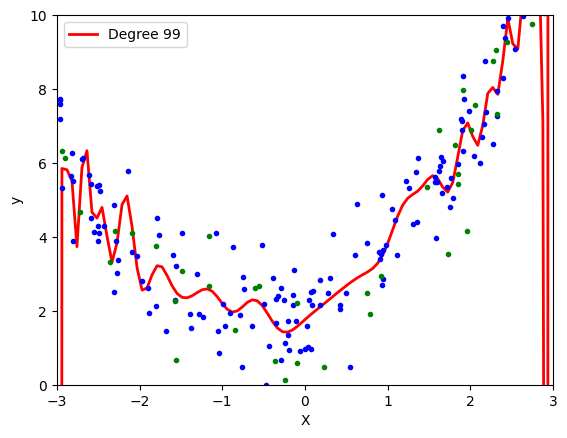

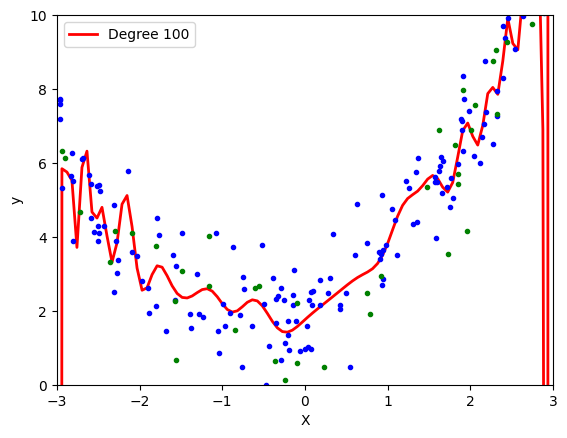

In [377]:
for degree in range(1, 100+1):
  # print(degree)
  polynomial_regression(degree)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



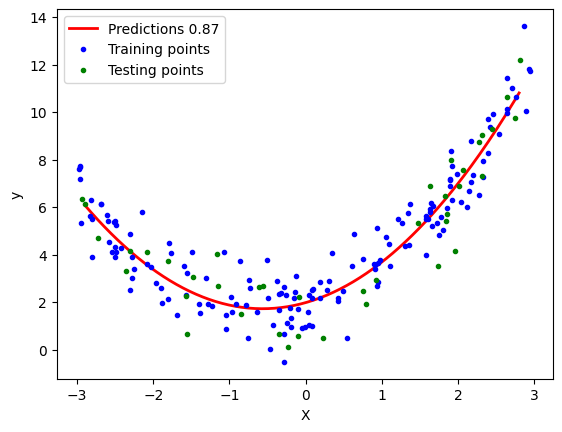

In [378]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Multiple Polynomial Linear Regression

In [379]:
# Creating 3D data
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [380]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [381]:
# Applying Linear regression
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [382]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [383]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

For Degree=2

In [384]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [385]:
X_multi_trans.shape

(100, 6)

In [386]:
print("Input (original no. of features) =", poly.n_features_in_)
print("Output (total no. of polynomial features) =", poly.n_output_features_)
print("Powers used for each transformed feature :\n", poly.powers_)

Input (original no. of features) = 2
Output (total no. of polynomial features) = 6
Powers used for each transformed feature :
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [387]:
#Applying Linear Regression
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [388]:
X_test_multi = poly.transform(final)

In [389]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [390]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

For Degree=30

In [391]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [392]:
X_multi_trans.shape

(100, 496)

In [393]:
print("Input (original no. of features) =", poly.n_features_in_)
print("Output (total no. of polynomial features) =", poly.n_output_features_)
# print("Powers used for each transformed feature :\n", poly.powers_)

Input (original no. of features) = 2
Output (total no. of polynomial features) = 496


In [394]:
#Applying Linear Regression
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [395]:
X_test_multi = poly.transform(final)

In [396]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [397]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()